In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from utils_iFEMG_feature import df_save_csv, fea_df_norm, df_norm

In [2]:
"""
读取超声数据
对每个人的两次测量求平均值
"""
excel_file_path = r"E:\Data\202403补实验\超声结果\统计结果\USdata202403.xlsx"

# 初始化两个df分别用于存储弯举和伸展的所有超声数据
bicps_curl_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])
tricps_stretch_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])

# 获取excel中的所有sheet name
excel_file = pd.ExcelFile(excel_file_path)
sheet_names = excel_file.sheet_names    # list

# 提取受试者名字
subject_names = []
for name_string in sheet_names:
    subject_names.append(name_string.split("-")[0])
    pass
subject_names = list(set(subject_names))
# print(subject_names)

# 提取相同名字的数据
for name in subject_names:
    two_test_name = [i for i in sheet_names if i.startswith(name)]  # 存储相同被试两次测试结果的sheet name
    # 读取两个结果的df求平均
    df1 = pd.read_excel(excel_file_path, two_test_name[0], header=[0,1,2])
    df2 = pd.read_excel(excel_file_path, two_test_name[1], header=[0,1,2])
    result_df = (df1 + df2)/2
    # 遍历4行数据（0kg, 0.5kg ,1kg ,2kg)，数据分别存进df
    for i in range(4):
        bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
                                                                "weight":               [result_df["weight"].values[i][0]],
                                                                "bicps_br_R":           [result_df['bicps_br']['bicps_br']['R'].values[i]],
                                                                "bicps_br_thickness":   [result_df['bicps_br']['bicps_br']['thickness'].values[i]],
                                                                "tricps_med_R":         [result_df['bicps_br']['tricps_m']['R'].values[i]],
                                                                "tricps_med_thickness": [result_df['bicps_br']['tricps_m']['thickness'].values[i]],
                                                                "tricps_lat_R":         [result_df['bicps_br']['tricps_l']['R'].values[i]],
                                                                "tricps_lat_thickness": [result_df['bicps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],
                                                                        "weight":               [result_df["weight"].values[i][0]],
                                                                        "bicps_br_R":           [result_df['tricps_br']['bicps_br']['R'].values[i]],
                                                                        "bicps_br_thickness":   [result_df['tricps_br']['bicps_br']['thickness'].values[i]],
                                                                        "tricps_med_R":         [result_df['tricps_br']['tricps_m']['R'].values[i]],
                                                                        "tricps_med_thickness": [result_df['tricps_br']['tricps_m']['thickness'].values[i]],
                                                                        "tricps_lat_R":         [result_df['tricps_br']['tricps_l']['R'].values[i]],
                                                                        "tricps_lat_thickness": [result_df['tricps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        pass
    pass

C:\Users\WeimyMark\AppData\Local\Temp\ipykernel_20948\553822264.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
C:\Users\WeimyMark\AppData\Local\Temp\ipykernel_20948\553822264.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],


In [3]:
# 超声平均数据存储
df_save_csv(bicps_curl_df, r"E:\Data\202403补实验\超声结果\统计结果\US_bicps_mean_202403.csv")
df_save_csv(tricps_stretch_df, r"E:\Data\202403补实验\超声结果\统计结果\US_tricps_mean_202403.csv")

File E:\Data\202403补实验\超声结果\统计结果\US_bicps_mean_202403.csv saved!
File E:\Data\202403补实验\超声结果\统计结果\US_tricps_mean_202403.csv saved!


In [5]:
"""
读取超声数据存进df
"""
excel_file_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\US_data-n.xlsx"

# 初始化两个df分别用于存储弯举和伸展的所有超声数据
bicps_curl_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])
tricps_stretch_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])

# 获取excel中的所有sheet name
excel_file = pd.ExcelFile(excel_file_path)
sheet_names = excel_file.sheet_names

# 遍历所有sheet读取数据并存入两个df
for name in sheet_names:
    sheet_df = pd.read_excel(excel_file_path, name, header=[0,1,2])
    # 遍历4行数据（0kg, 0.5kg ,1kg ,2kg)
    for i in range(4):
        bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
                                                                "weight":               [sheet_df["weight"].values[i][0]],
                                                                "bicps_br_R":           [sheet_df['bicps_br']['bicps_br']['R'].values[i]],
                                                                "bicps_br_thickness":   [sheet_df['bicps_br']['bicps_br']['thickness'].values[i]],
                                                                "tricps_med_R":         [sheet_df['bicps_br']['tricps_m']['R'].values[i]],
                                                                "tricps_med_thickness": [sheet_df['bicps_br']['tricps_m']['thickness'].values[i]],
                                                                "tricps_lat_R":         [sheet_df['bicps_br']['tricps_l']['R'].values[i]],
                                                                "tricps_lat_thickness": [sheet_df['bicps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],
                                                                        "weight":               [sheet_df["weight"].values[i][0]],
                                                                        "bicps_br_R":           [sheet_df['tricps_br']['bicps_br']['R'].values[i]],
                                                                        "bicps_br_thickness":   [sheet_df['tricps_br']['bicps_br']['thickness'].values[i]],
                                                                        "tricps_med_R":         [sheet_df['tricps_br']['tricps_m']['R'].values[i]],
                                                                        "tricps_med_thickness": [sheet_df['tricps_br']['tricps_m']['thickness'].values[i]],
                                                                        "tricps_lat_R":         [sheet_df['tricps_br']['tricps_l']['R'].values[i]],
                                                                        "tricps_lat_thickness": [sheet_df['tricps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        pass
    
    pass

C:\Users\WeimyMark\AppData\Local\Temp\ipykernel_17340\2348353935.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
C:\Users\WeimyMark\AppData\Local\Temp\ipykernel_17340\2348353935.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],


In [7]:

df_save_csv(bicps_curl_df, r"E:\Data\20230424-单人双次iFEMG肌力等级测试\US_bicps.csv")
df_save_csv(tricps_stretch_df, r"E:\Data\20230424-单人双次iFEMG肌力等级测试\US_tricps.csv")

File E:\Data\20230424-单人双次iFEMG肌力等级测试\US_bicps.csv saved!
File E:\Data\20230424-单人双次iFEMG肌力等级测试\US_tricps.csv saved!


In [2]:
"""
读取超声数据
归一化
存进df"""
excel_file_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\US_data-n.xlsx"

# 初始化两个df分别用于存储弯举和伸展的所有超声数据
bicps_curl_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])
tricps_stretch_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])

# 获取excel中的所有sheet name
excel_file = pd.ExcelFile(excel_file_path)
sheet_names = excel_file.sheet_names

# 遍历所有sheet读取数据并存入两个df
for name in sheet_names:
    sheet_df = pd.read_excel(excel_file_path, name, header=[0,1,2])
    # 对每个sheet_df进行归一化
    sheet_df_norm = df_norm(sheet_df, col_name=[( 'bicps_br',           'bicps_br',                  'R'),
                                                ( 'bicps_br',           'bicps_br',          'thickness'),
                                                ( 'bicps_br',           'tricps_m',                  'R'),
                                                ( 'bicps_br',           'tricps_m',          'thickness'),
                                                ( 'bicps_br',           'tricps_l',                  'R'),
                                                ( 'bicps_br',           'tricps_l',          'thickness'),
                                                ('tricps_br',           'bicps_br',                  'R'),
                                                ('tricps_br',           'bicps_br',          'thickness'),
                                                ('tricps_br',           'tricps_m',                  'R'),
                                                ('tricps_br',           'tricps_m',          'thickness'),
                                                ('tricps_br',           'tricps_l',                  'R'),
                                                ('tricps_br',           'tricps_l',          'thickness')], method="min-max")
    # 遍历4行数据（0kg, 0.5kg ,1kg ,2kg)
    for i in range(4):
        bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
                                                                "weight":               [sheet_df_norm["weight"].values[i][0]],
                                                                "bicps_br_R":           [sheet_df_norm['bicps_br']['bicps_br']['R'].values[i]],
                                                                "bicps_br_thickness":   [sheet_df_norm['bicps_br']['bicps_br']['thickness'].values[i]],
                                                                "tricps_med_R":         [sheet_df_norm['bicps_br']['tricps_m']['R'].values[i]],
                                                                "tricps_med_thickness": [sheet_df_norm['bicps_br']['tricps_m']['thickness'].values[i]],
                                                                "tricps_lat_R":         [sheet_df_norm['bicps_br']['tricps_l']['R'].values[i]],
                                                                "tricps_lat_thickness": [sheet_df_norm['bicps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],
                                                                        "weight":               [sheet_df_norm["weight"].values[i][0]],
                                                                        "bicps_br_R":           [sheet_df_norm['tricps_br']['bicps_br']['R'].values[i]],
                                                                        "bicps_br_thickness":   [sheet_df_norm['tricps_br']['bicps_br']['thickness'].values[i]],
                                                                        "tricps_med_R":         [sheet_df_norm['tricps_br']['tricps_m']['R'].values[i]],
                                                                        "tricps_med_thickness": [sheet_df_norm['tricps_br']['tricps_m']['thickness'].values[i]],
                                                                        "tricps_lat_R":         [sheet_df_norm['tricps_br']['tricps_l']['R'].values[i]],
                                                                        "tricps_lat_thickness": [sheet_df_norm['tricps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        pass
    
    pass

In [8]:
tri_0kg = tricps_stretch_df[tricps_stretch_df["weight"] == 1]
df_save_csv(tri_0kg, r"E:\Data\20230424-单人双次iFEMG肌力等级测试\超声\tricps_1kg_df.csv")

Done!


In [6]:
df_save_csv(tricps_stretch_df, r"E:\Data\20230424-单人双次iFEMG肌力等级测试\超声\tricps_stretch_df.csv")

Done!


In [13]:

bicps_curl_df["tricps_lat_thickness"].values

array([26.7983    , 26.57      , 27.285     , 28.1617    , 27.19      ,
       26.2217    , 26.48      , 27.7417    , 30.1667    , 30.5717    ,
       31.2333    , 30.9017    , 30.4067    , 30.6183    , 30.495     ,
       31.8383    , 25.995     , 26.06833333, 26.51833333, 27.42166667,
       29.8783    , 27.595     , 26.975     , 28.2533    , 26.30333333,
       25.36333333, 27.4       , 28.35333333, 25.21      , 27.27833333,
       26.88666667, 30.83      , 27.80166667, 26.49      , 27.41      ,
       28.06666667, 28.15666667, 28.09666667, 26.73333333, 28.87      ,
       24.97333333, 23.32333333, 23.31333333, 25.78333333, 21.00666667,
       22.665     , 24.33666667, 24.35833333, 27.11      , 28.11166667,
       27.15833333, 27.08166667, 26.76      , 28.11      , 27.07666667,
       26.92833333, 28.57666667, 27.985     , 26.91166667, 31.14666667,
       30.485     , 30.07166667, 30.52666667, 34.05      , 24.54      ,
       24.78166667, 24.59      , 25.97833333, 23.64      , 23.16

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 0.5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.390e-02 U_stat=2.840e+02
0.5 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.075e-01 U_stat=2.600e+02
0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.357e-04 U_stat=3.240e+02


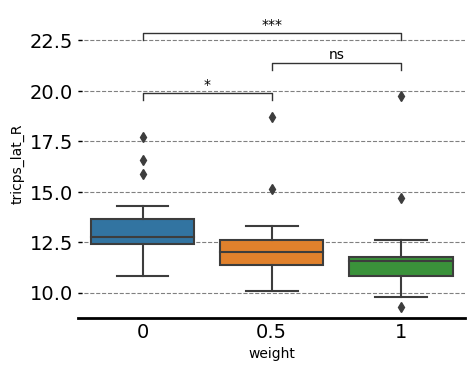

In [15]:
"""
结果可视化

对超声数据进行配对的T检验？
实际使用的是单因素方差分析
"""

df2show = tricps_stretch_df
x = "weight"
y = "tricps_lat_R"
order = [0, 0.5, 1]
fig,ax = plt.subplots(figsize=(5,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df2show, x=x, y=y, order=order,ax=ax)
 
#pairs=[(0, 0.5), (0, 1), (0, 2), (0.5, 1), (0.5, 2), (1, 2)]
pairs=[(0, 0.5), (0, 1), (0.5, 1)]
annotator = Annotator(ax, pairs, data=df2show, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()
 
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.grid(axis='y',ls='--',c='gray')
ax.set_axisbelow(True)
plt.show()

In [15]:
bicps_curl_df

,subject,weight,bicps_br_R,bicps_br_thickness,tricps_med_R,tricps_med_thickness,tricps_lat_R,tricps_lat_thickness
0,lpy-1,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.143432
1,lpy-1,0.5,0.623235,0.539472,0.391181,0.546934,1.000000,0.000000
2,lpy-1,1.0,0.534473,0.882000,0.000000,0.158353,0.612454,0.449205
3,lpy-1,2.0,0.000000,1.000000,0.674147,0.000000,0.000000,1.000000
4,lpy-2,0.0,1.000000,0.000000,0.461221,1.000000,1.000000,0.637039
...,...,...,...,...,...,...,...,...
75,zpk-1,2.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.369683
76,zpk-2,0.0,1.000000,0.000000,0.790144,0.000000,1.000000,0.061880
77,zpk-2,0.5,0.357293,0.595376,0.530926,1.000000,0.000000,0.000000
78,zpk-2,1.0,0.116111,0.450867,0.000000,0.244306,0.868180,0.858727


e:\anaconda\install\lib\site-packages\seaborn\categorical.py:81: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, np.float) for k, s in iter_data]


TypeError: Annotator.__init__() missing 2 required positional arguments: 'ax' and 'pairs'

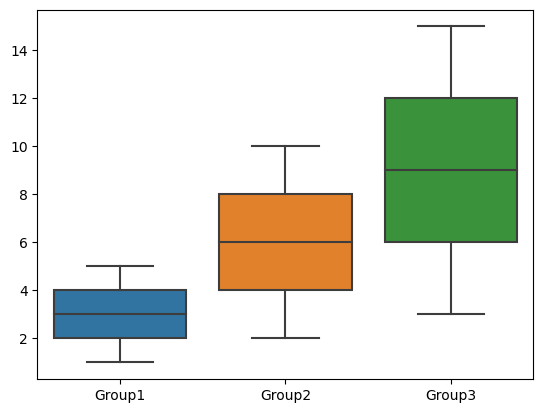

In [4]:
group1 = [1, 2, 3, 4, 5]
group2 = [2, 4, 6, 8, 10]
group3 = [3, 6, 9, 12, 15]

data = pd.DataFrame({'Group1': group1, 'Group2': group2, 'Group3': group3})

f_value, p_value = stats.f_oneway(group1, group2, group3)

sns.boxplot(data=data)

annot = Annotator(data=data)
annot.apply_test(hue_column='Group')
annot.annotate()